In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import toml
plt.rcParams.update({'font.size': 14})
# %matplotlib widget

In [2]:
# def calc_std(data, instr=0):
#     return np.mean(data), np.sqrt(np.std(data)**2+instr**2)

# (calc_std(wiredata[0], 0.1), calc_std(wiredata[1], 0.005))

# dmicro, deltadmirco = calc_std(wiredata[1], 0.005)
# dmicro, deltadmirco

In [3]:
wiredata = pd.read_csv("wiredata.csv", header=None).to_numpy()
wiredata1 = wiredata[1]
instr = 0.01

d_micro = np.mean(wiredata1)
sigma = np.std(wiredata1)
delta_d_micro = np.sqrt(np.std(wiredata1)**2+instr**2)
S = np.pi * (d_micro)**2 / 4 # мм^2
dS = S * (2*(delta_d_micro/d_micro)**2)**0.5

In [4]:
l = np.array([20, 30, 50])
dl = 0.2
data = pd.read_csv("data.csv", header=None)
data.columns = pd.MultiIndex.from_product([l, ['U, mV', 'I, mA']], names=['l, cm', None])
data.index = np.arange(1, 13)
data

l, cm     20           30           50      
       U, mV I, mA  U, mV I, mA  U, mV I, mA
1       11.0     5   15.9     5   65.3  12.5
2       30.7    15   47.3    15  128.4  25.0
3       52.9    25   77.6    25  183.6  35.0
4       74.1    35  114.1    35  292.5  55.0
5      117.1    55  175.8    55  345.2  65.0
6      160.2    75  240.4    75  399.8  75.0
7      139.2    65  208.3    65  373.6  70.0
8      106.4    50  159.4    50  321.1  60.0
9       85.8    40  126.7    40  240.7  45.0
10      63.1    30   96.2    30  156.2  30.0
11      41.5    20   64.3    20  107.0  20.0
12      20.8    10   31.6    10   25.1   5.0

In [5]:
# U = npdata[0]
# dU = (0.0003 * U / 1000 + 4 * 0.0001) * 1000
# I = npdata[1]
# dI = I * 0 + 0.25
# dI = np.array([0.25])
# U, I, np.polyfit(I, U, 1)
# w_i = 1 / dU ** 2
# W = sum(w_i)


def avg_prime(x, dx):
    w_i = dx ** -2
    W = np.sum(w_i)
    return sum(w_i * x) / W

def chi2(x, y, dy):
    return avg_prime(x * y, dy) / avg_prime(x * x, dy)

def get_R(I, U):
    dU = (0.0003 * U / 1000 + 4 * 0.0001) * 1000
    dI = I * 0 + 0.25
    return 1/chi2(U, I, dI)

# R_chi = avg_prime(I * U, np.sqrt(dI ** 2 + dU ** 2)) \
#     / avg_prime(I**2, (dI ** 2 + dI ** 2) ** 0.5)
# R_chi = avg_prime(I * U, dU) \
#     / avg_prime(I**2, dU)
# R_chi = 1 / (avg_prime(I * U, dI) / avg_prime(U**2, dI))

# get_R(I, U)

2.1304255124031357 0 0.10652127562015679 [0.01131802 0.         0.        ]
3.198590559958465 0 0.10661968533194884 [0.01131802 0.01798576 0.        ]
5.318620604760355 0 0.10637241209520709 [0.01131802 0.01798576 0.03094615]


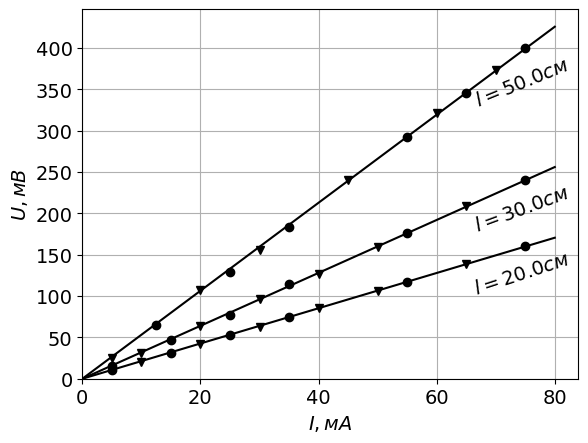

In [6]:
dataT = data.to_numpy()
npdata = dataT.T
gen = iter(npdata)
plt.xlabel("$I, мА$")
plt.ylabel("$U, мВ$")
plt.grid()
Rprime = np.array([0.0]*3)
dR = np.array([0.0]*3)
rho = []
for i, (U, I) in enumerate(zip(gen, gen)):
    # dU = 0.0003 * U + 4 * 0.1
    # k, b = np.polyfit(I, U, 1)
    k = get_R(I, U)
    b = 0
    Rprime[i] = k
    dR[i] = (1/(len(Rprime)-1)*(sum(U*U)/sum(I*I)-(sum(I * U) / sum(I**2))**2))**0.5
    print(k, b, k / l[i], dR)
    # rho.append(k * S/l[i])
    x = np.array([0, 80])
    y = x * k + b
    plt.plot(I[:6], U[:6], 'ok')
    plt.plot(I[6:], U[6:], 'vk')
    # plt.errorbar(I, U, xerr=dI, yerr=dU, fmt=',k')
    plt.plot(x, y, 'k')
    ang = np.arctan(k) * 16
    plt.text(I.max()-9, U.max()*0.95-50, f"$l={l[i]:.1f} см$", rotation=ang)
# plt.plot(x, x * R_chi)
plt.xlim(0)
plt.ylim(0)
plt.savefig('plot.svg')
# plt.plot(npdata[0][:8], npdata[1][:8]) 
R = Rprime * (1 + Rprime / 10e7)
rho = R * S / l / 100 / 100 * 1e6
drho = rho * ((dR/R)**2+(dS/S)**2+(dl/l)**2)**0.5
rho_mean = np.mean(rho)
drho_mean = sum(drho**2)**0.5/3


In [7]:
# x = avg_prime(I, dI)
# y = avg_prime(U, dU)
# xy = avg_prime(I * U, np.sqrt(dI ** 2 + dU ** 2))
# x2 = avg_prime(I**2, np.sqrt(dI ** 2 + dI ** 2))

# k = (xy - x * y) / (x2 - x**2)
# b = y - k * x
# k / 20, b

In [8]:
# sum(I * U) / sum(I**2)

In [9]:
R_most = np.array([2.281, 3.309, 5.339])
rho_most = R_most * S / l / 100 / 100 * 1e6
rho_most

array([1.19335841, 1.15412041, 1.11728901])

In [10]:
import inspect
import toml

with open('data.toml', 'w') as _f:
    _vars = %who_ls
    _globals = globals()
    _d = {
        k: _globals[k]
        for k in _vars
        if not inspect.ismodule(_globals[k])
        and not inspect.isfunction(_globals[k])
        and not k.startswith('_')
        and not _globals[k].__repr__().startswith('<')
    }
    toml.dump(_d, _f, encoder=toml.TomlNumpyEncoder())
